In [5]:
import networkx as nx
import numpy as np
import itertools 

def kplaplacian_ltf(G,lam):
    nodes = G.nodes()
    nodelist = list(itertools.combinations(nodes,2))
    nsize    = len(nodes)
    L = np.zeros(shape=(nsize,nsize))
    for n in nodelist:
        k = nx.shortest_path_length(G, source=n[0], target=n[1])
        if k==1:
            L[n[0]-1,n[1]-1]= L[n[1]-1,n[0]-1]= -1
        else:
            L[n[0]-1,n[1]-1]= L[n[1]-1,n[0]-1]= -np.exp(-lam*k)
    row,col = np.diag_indices_from(L)
    L[row,col] = -L.sum(axis=1)
    return L

In [13]:
def kplaplacian_mtf(G,s):
    nodes = G.nodes()
    nodelist = list(itertools.combinations(nodes,2))
    nsize    = len(nodes)
    L = np.zeros(shape=(nsize,nsize))
    for n in nodelist:
        k = nx.shortest_path_length(G, source=n[0], target=n[1])
        if k==1:
            L[n[0]-1,n[1]-1]= L[n[1]-1,n[0]-1]= -1
        else:
            L[n[0]-1,n[1]-1]= L[n[1]-1,n[0]-1]= -(1/pow(k,s))
    row,col = np.diag_indices_from(L)
    L[row,col] = -L.sum(axis=1)
    return L

In [23]:
import networkx as nx
import numpy as np
import itertools 

def kplaplacian(G,k):
    nodes = G.nodes()
    nodelist = list(itertools.combinations(nodes,2))
    nsize    = len(nodes)
    L = np.zeros(shape=(nsize,nsize))
    for n in nodelist:
        d = nx.shortest_path_length(G, source=n[0], target=n[1])
        if d==k:
            L[n[0]-1,n[1]-1]= L[n[1]-1,n[0]-1]= -1
        #else:
            #L[n[0]-1,n[1]-1]= L[n[1]-1,n[0]-1]= -np.exp(-lam*k)
    row,col = np.diag_indices_from(L)
    L[row,col] = -L.sum(axis=1)
    return L

[ -2.22044605e-16+0.j   8.29913513e-01+0.j   4.48119430e+00+0.j
   2.68889218e+00+0.j   2.00000000e+00+0.j]
[ -4.44089210e-16+0.j   8.81522814e-01+0.j   4.48612014e+00+0.j
   2.72889274e+00+0.j   2.05494692e+00+0.j]


/usr/lib/python3/dist-packages/numpy/core/numeric.py:531: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


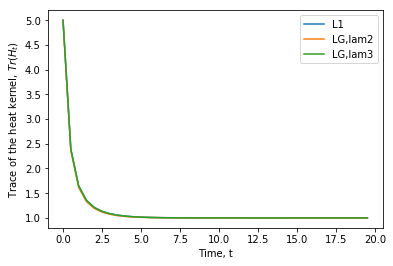

In [22]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import eigvals

G = nx.Graph([(1,2),(2,3),(3,4),(4,5),(2,5)])


l1 = eigvals(nx.laplacian_matrix(G).todense())
l2 = eigvals(kplaplacian_ltf(G,2))
l3 = eigvals(kplaplacian_ltf(G,3))
print(l1)
print(l2)
time = np.arange(0,20,0.5)

T1=[]
T2=[]
T3 = []
TT=[]
for t in time:
    T1.append(np.sum(np.exp(-t*(l1))))
    T2.append(np.sum(np.exp(-t*(l2))))
    T3.append(np.sum(np.exp(-t*(l3))))

plt.plot(time,T1, label='L1')
plt.plot(time,T2, label='LG,lam2')
plt.plot(time,T3, label='LG,lam3')
plt.xlabel('Time, t')
plt.ylabel('Trace of the heat kernel, $Tr(H_t)$')
plt.legend()
plt.show()

[ -2.22044605e-16+0.j   8.29913513e-01+0.j   4.48119430e+00+0.j
   2.68889218e+00+0.j   2.00000000e+00+0.j]
[ -4.44089210e-16+0.j   1.64988707e+00+0.j   3.24836101e+00+0.j
   4.57397414e+00+0.j   2.75000000e+00+0.j]
[ -6.66133815e-16+0.j   1.21185082e+00+0.j   4.52167767e+00+0.j
   2.96554559e+00+0.j   2.37500000e+00+0.j]
[ 0.00000000+0.j  1.01165184+0.j  4.49939708+0.j  2.82614244+0.j
  2.18750000+0.j]
[  2.22044605e-16+0.j   9.17711938e-01+0.j   4.48961282e+00+0.j
   2.75715569e+00+0.j   2.09375000e+00+0.j]


/usr/lib/python3/dist-packages/numpy/core/numeric.py:531: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


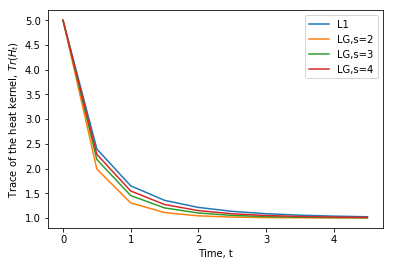

In [21]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import eigvals

G = nx.Graph([(1,2),(2,3),(3,4),(4,5),(2,5)])


l1 = eigvals(nx.laplacian_matrix(G).todense())
l2 = eigvals(kplaplacian_mtf(G,2))
l3 = eigvals(kplaplacian_mtf(G,3))
l4 = eigvals(kplaplacian_mtf(G,4))
l5 = eigvals(kplaplacian_mtf(G,5))
#print(l1)
#print(l2)
#print(l3)
#print(l4)
#print(l5)
time = np.arange(0,5,0.5)

T1=[]
T2=[]
T3 = []
T4 =[]
TT=[]
for t in time:
    T1.append(np.sum(np.exp(-t*(l1))))
    T2.append(np.sum(np.exp(-t*(l2))))
    T3.append(np.sum(np.exp(-t*(l3))))
    T4.append(np.sum(np.exp(-t*(l4))))

plt.plot(time,T1, label='L1')
plt.plot(time,T2, label='LG,s=2')
plt.plot(time,T3, label='LG,s=3')
plt.plot(time,T4, label='LG,s=4')
plt.xlabel('Time, t')
plt.ylabel('Trace of the heat kernel, $Tr(H_t)$')
plt.legend()
plt.show()

/usr/lib/python3/dist-packages/numpy/core/numeric.py:531: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


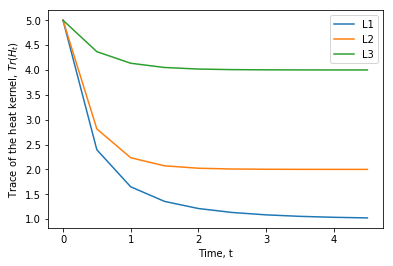

In [26]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import eigvals

G = nx.Graph([(1,2),(2,3),(3,4),(4,5),(2,5)])
l1 = eigvals(kplaplacian(G,1))
l2 = eigvals(kplaplacian(G,2))
l3 = eigvals(kplaplacian(G,3))
#print(l1)
#print(l2)
#print(l3)
#print(l4)
#print(l5)
time = np.arange(0,5,0.5)

T1=[]
T2=[]
T3 = []
TT=[]
for t in time:
    T1.append(np.sum(np.exp(-t*(l1))))
    T2.append(np.sum(np.exp(-t*(l2))))
    T3.append(np.sum(np.exp(-t*(l3))))

plt.plot(time,T1, label='L1')
plt.plot(time,T2, label='L2')
plt.plot(time,T3, label='L3')
plt.xlabel('Time, t')
plt.ylabel('Trace of the heat kernel, $Tr(H_t)$')
plt.legend()
plt.show()